1.爬取网站（高德开放平台https://lbs.amap.com/）

①非南山区的数据

In [ ]:
import requests
import pandas as pd
import time

AMAP_KEY = "f121e33872c23a41e6e478207c4d38a1"

DISTRICTS_8 = ["福田区", "罗湖区", "宝安区", "龙岗区", "龙华区", "盐田区", "光明区", "坪山区"]

all_data = []

print("开始爬取 8 个区...\n")

for district in DISTRICTS_8:
    print(f"正在爬取：{district} ...")
    district_count = 0

    for page in range(1, 11):
        params = {
            "key": AMAP_KEY,
            "keywords": "美食",
            "types": "050000",
            "city": district,       
            "offset": 20,
            "page": page
        }

        resp = requests.get("https://restapi.amap.com/v3/place/text", params=params).json()
        pois = resp.get("pois", [])

        if not pois:
            print(f"  {district} 第 {page} 页无数据，停止")
            break

        for poi in pois:
            lng, lat = poi.get("location","0,0").split(",")
            all_data.append({
                "name": poi.get("name"),
                "type": poi.get("type"),
                "address": poi.get("address"),
                "district": district,      
                "lng": float(lng),
                "lat": float(lat),
                "rating": poi.get("biz_ext",{}).get("rating"),
                "cost": poi.get("biz_ext",{}).get("cost")
            })
            district_count += 1
        
        print(f"  第 {page} 页完成，本区累计 {district_count} 条")
        time.sleep(0.3)
    

df = pd.DataFrame(all_data)
print("\n最终各区数据量：")
print(df["district"].value_counts())

df.to_csv("shenzhen_food_poi.csv", index=False, encoding="utf-8-sig")
print("\n所有数据保存完成！")

开始爬取 8 个区（排除南山区）...

正在爬取：福田区 ...
  第 1 页完成，本区累计 20 条
  第 2 页完成，本区累计 40 条
  第 3 页完成，本区累计 60 条
  第 4 页完成，本区累计 80 条
  第 5 页完成，本区累计 100 条
  第 6 页完成，本区累计 120 条
  第 7 页完成，本区累计 140 条
  第 8 页完成，本区累计 160 条
  第 9 页完成，本区累计 180 条
  第 10 页完成，本区累计 200 条
正在爬取：罗湖区 ...
  第 1 页完成，本区累计 20 条
  第 2 页完成，本区累计 40 条
  第 3 页完成，本区累计 60 条
  第 4 页完成，本区累计 80 条
  第 5 页完成，本区累计 100 条
  第 6 页完成，本区累计 120 条
  第 7 页完成，本区累计 140 条
  第 8 页完成，本区累计 160 条
  第 9 页完成，本区累计 180 条
  第 10 页完成，本区累计 200 条
正在爬取：宝安区 ...
  第 1 页完成，本区累计 20 条
  第 2 页完成，本区累计 40 条
  第 3 页完成，本区累计 60 条
  第 4 页完成，本区累计 80 条
  第 5 页完成，本区累计 100 条
  第 6 页完成，本区累计 120 条
  第 7 页完成，本区累计 140 条
  第 8 页完成，本区累计 160 条
  第 9 页完成，本区累计 180 条
  第 10 页完成，本区累计 200 条
正在爬取：龙岗区 ...
  第 1 页完成，本区累计 20 条
  第 2 页完成，本区累计 40 条
  第 3 页完成，本区累计 60 条
  第 4 页完成，本区累计 80 条
  第 5 页完成，本区累计 100 条
  第 6 页完成，本区累计 120 条
  第 7 页完成，本区累计 140 条
  第 8 页完成，本区累计 160 条
  第 9 页完成，本区累计 180 条
  第 10 页完成，本区累计 200 条
正在爬取：龙华区 ...
  第 1 页完成，本区累计 20 条
  第 2 页完成，本区累计 40 条
  第 3 页完成，本区累计 60 条
  第 4 页完成，本区累计 80 条
  第 5 

②南山区的数据

In [46]:
import requests

AMAP_KEY = "f121e33872c23a41e6e478207c4d38a1"

def get_nanshan_polygon_from_shenzhen():
    url = "https://restapi.amap.com/v3/config/district"
    params = {
        "key": AMAP_KEY,
        "keywords": "深圳市",   # 先查“深圳市”
        "subdistrict": 2,      # 往下查到区县级
        "extensions": "all"
    }
    resp = requests.get(url, params=params).json()
    print("district 接口返回 status:", resp.get("status"), "info:", resp.get("info"))

    if resp.get("status") != "1":
        print("❌ 行政区查询失败：", resp)
        return None

    city = resp["districts"][0]   # 深圳市
    subdistricts = city.get("districts", [])
    print("深圳市下属行政区：")
    for d in subdistricts:
        print(" -", d["name"], d["adcode"])

    # 在子区中找到“南山区”
    for d in subdistricts:
        if d["name"] == "南山区":
            print("\n✅ 找到南山区，adcode =", d["adcode"])
            polyline = d["polyline"]
            print("polyline 开头：", polyline[:200], "...")
            return polyline

    print("⚠ 没有在深圳市的子区中找到 '南山区'")
    return None

polygon = get_nanshan_polygon_from_shenzhen()


district 接口返回 status: 1 info: OK
深圳市下属行政区：
 - 宝安区 440306
 - 南山区 440305
 - 龙岗区 440307
 - 光明区 440311
 - 福田区 440304
 - 罗湖区 440303
 - 坪山区 440310
 - 盐田区 440308
 - 龙华区 440309

✅ 找到南山区，adcode = 440305


KeyError: 'polyline'

In [28]:
import requests

AMAP_KEY = "f121e33872c23a41e6e478207c4d38a1"

def get_polygon_by_adcode(adcode):
    url = "https://restapi.amap.com/v3/config/district"
    params = {
        "key": AMAP_KEY,
        "keywords": adcode,   # 直接按 adcode 精确查
        "subdistrict": 0,
        "extensions": "all"
    }
    resp = requests.get(url, params=params).json()
    
    print("status:", resp.get("status"), "info:", resp.get("info"))

    if resp.get("status") != "1":
        print("❌ 查询失败：", resp)
        return None

    district = resp["districts"][0]
    
    # 有些区的 polyline 在 "polyline" 字段里
    if "polyline" in district:
        poly = district["polyline"]
        print("polyline 获取成功！")
        print(poly[:200], "...")
        return poly

    # 极少数情况下 polygon 信息在 children 里（但南山区不会）
    print("⚠ 该行政区未直接给 polyline 字段，原始数据如下：")
    print(district)
    return None

polygon = get_polygon_by_adcode("440305")

print("\n最终 polygon 前200字符：")
print(polygon[:200])


status: 1 info: OK
polyline 获取成功！
113.844477,22.510217;113.843568,22.511037;113.842953,22.511911;113.842512,22.512667;113.842339,22.5136;113.842278,22.51477;113.842538,22.515822;113.844412,22.517083;113.845078,22.517269;113.845659,22. ...

最终 polygon 前200字符：
113.844477,22.510217;113.843568,22.511037;113.842953,22.511911;113.842512,22.512667;113.842339,22.5136;113.842278,22.51477;113.842538,22.515822;113.844412,22.517083;113.845078,22.517269;113.845659,22.


In [31]:
# polygon -> 坐标点列表
coords = []
for segment in polygon.split('|'):  # 防止多段
    for point in segment.split(';'):
        lng, lat = map(float, point.split(','))
        coords.append((lng, lat))

lngs = [p[0] for p in coords]
lats = [p[1] for p in coords]

# 得到 bounding box
min_lng, max_lng = min(lngs), max(lngs)
min_lat, max_lat = min(lats), max(lats)

bbox = f"{min_lng},{min_lat};{max_lng},{max_lat}"

print("南山区 bbox：", bbox)


南山区 bbox： 113.786278,22.396344;114.026421,22.652478


In [32]:
def crawl_bbox(bbox):
    all_data = []
    page = 1

    while True:
        url = "https://restapi.amap.com/v3/place/polygon"
        params = {
            "key": AMAP_KEY,
            "polygon": bbox,     # 用 bbox！
            "keywords": "美食",
            "types": "050000",
            "offset": 25,
            "page": page
        }

        response = requests.get(url, params=params)
        print(f"请求第 {page} 页，HTTP 状态码：{response.status_code}")

        try:
            resp = response.json()
        except:
            print("❌ JSON 解析失败：", response.text[:200])
            break

        if resp.get("status") != "1":
            print("❌ 接口异常：", resp)
            break

        pois = resp.get("pois", [])
        if not pois:
            print("✔ 无更多数据，结束抓取。")
            break

        for poi in pois:
            loc = poi.get("location", "0,0")
            try: lng, lat = map(float, loc.split(","))
            except: continue

            biz = poi.get("biz_ext", {}) or {}

            all_data.append({
                "name": poi.get("name"),
                "type": poi.get("type"),
                "address": poi.get("address"),
                "district": poi.get("adname"),
                "lng": lng,
                "lat": lat,
                "rating": biz.get("rating"),
                "cost": biz.get("cost")
            })

        print(f"第 {page} 页获取 {len(pois)} 条，目前累计：{len(all_data)} 条")
        page += 1
        time.sleep(0.3)

    return pd.DataFrame(all_data)

print("\n开始使用 bbox 爬取南山区 POI ...\n")
df_ns = crawl_bbox(bbox)

print("\n⭐ 爬取完成！共获取：", len(df_ns), "条数据。")
df_ns.to_csv("shenzhen_food_poi_nanshan.csv", index=False)



开始使用 bbox 爬取南山区 POI ...

请求第 1 页，HTTP 状态码：200
第 1 页获取 25 条，目前累计：25 条
请求第 2 页，HTTP 状态码：200
第 2 页获取 25 条，目前累计：50 条
请求第 3 页，HTTP 状态码：200
第 3 页获取 25 条，目前累计：75 条
请求第 4 页，HTTP 状态码：200
第 4 页获取 25 条，目前累计：100 条
请求第 5 页，HTTP 状态码：200
第 5 页获取 25 条，目前累计：125 条
请求第 6 页，HTTP 状态码：200
第 6 页获取 25 条，目前累计：150 条
请求第 7 页，HTTP 状态码：200
第 7 页获取 25 条，目前累计：175 条
请求第 8 页，HTTP 状态码：200
第 8 页获取 25 条，目前累计：200 条
请求第 9 页，HTTP 状态码：200
第 9 页获取 25 条，目前累计：225 条
请求第 10 页，HTTP 状态码：200
✔ 无更多数据，结束抓取。

⭐ 爬取完成！共获取： 225 条数据。


③合并CSV

In [49]:
import pandas as pd

df1 = pd.read_csv('shenzhen_food_poi_nanshan.csv')

df2 = pd.read_csv('shenzhen_food_poi.csv')

merged_df = pd.concat([df1, df2], ignore_index=True)  

merged_df.to_csv('shenzhen_food_poi_others+nanshan.csv', index=False)  

print("CSV文件合并完成，已保存为 shenzhen_food_poi_others+nanshan.csv")

CSV文件合并完成，已保存为 shenzhen_food_poi_others+nanshan.csv


2.数据清洗

In [50]:
#①初步检查
import pandas as pd
import numpy as np

df = pd.read_csv("shenzhen_food_poi_others+nanshan.csv")

print("数据基本信息：")
df.info()

print("\n缺失值情况：")
print(df.isna().sum())

#②删除重复
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"重复值已删除：{before - after} 条")

#③经纬度检查


df["lng"] = pd.to_numeric(df["lng"], errors="coerce")
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")

valid_df = df[
    (df["lng"].between(113, 115)) &
    (df["lat"].between(22.4, 22.85))
]

print(f"异常经纬度记录：{len(df) - len(valid_df)} 条，已删除")
df = valid_df


#④评分清洗
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

df.loc[(df["rating"] < 0) | (df["rating"] > 5), "rating"] = np.nan

print("评分清洗完成，缺失值数量：", df["rating"].isna().sum())
df["cost"] = pd.to_numeric(df["cost"], errors="coerce")

#⑤人均消费
df.loc[df["cost"] > 3000, "cost"] = np.nan

print("消费清洗完成，缺失值数量：", df["cost"].isna().sum())

#⑥食品字段

df["main_type"] = df["type"].apply(lambda x: str(x).split(";")[0] if pd.notna(x) else None)

#⑦地址去空格
print("\n清洗后的数据：")
df.info()

print("\n缺失值统计：")
print(df.isna().sum())

#保存
df.to_csv("shenzhen_food_poi_cleaned.csv", index=False, encoding="utf-8-sig")
print("清洗后的数据已保存为 shenzhen_food_poi_cleaned.csv")



数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1825 non-null   object 
 1   type      1825 non-null   object 
 2   address   1825 non-null   object 
 3   district  1825 non-null   object 
 4   lng       1825 non-null   float64
 5   lat       1825 non-null   float64
 6   rating    1825 non-null   float64
 7   cost      1825 non-null   object 
dtypes: float64(3), object(5)
memory usage: 114.2+ KB

缺失值情况：
name        0
type        0
address     0
district    0
lng         0
lat         0
rating      0
cost        0
dtype: int64
重复值已删除：10 条
异常经纬度记录：0 条，已删除
评分清洗完成，缺失值数量： 0
消费清洗完成，缺失值数量： 166

清洗后的数据：
<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1824
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1815 non-null   object 
 1   type       1

3.可视化分析

①深圳美食热力图

In [34]:
import pandas as pd
import folium
from folium.plugins import HeatMap

df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

df["lng"] = df["lng"].astype(float)
df["lat"] = df["lat"].astype(float)

center = [22.543096, 114.057865]

m = folium.Map(location=center, zoom_start=12)

heat_data = df[["lat","lng"]].values.tolist()

HeatMap(heat_data, radius=10).add_to(m)

m.save("shenzhen_food_heatmap.html")

print("热力图已生成：shenzhen_food_heatmap.html")


热力图已生成：shenzhen_food_heatmap.html


②KMeans 聚类分析

In [35]:
import pandas as pd
import folium
from sklearn.cluster import KMeans


df = pd.read_csv("shenzhen_food_poi_cleaned.csv")
df["lng"] = df["lng"].astype(float)
df["lat"] = df["lat"].astype(float)

coords = df[["lat", "lng"]]

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(coords)

center = [22.543096, 114.057865]
m = folium.Map(location=center, zoom_start=12)

colors = ["red", "blue", "green", "purple", "orange"]

for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=3,
        color=colors[row["cluster"]],
        fill=True,
        fill_opacity=0.7
    ).add_to(m)


for idx, c in enumerate(kmeans.cluster_centers_):
    folium.Marker(
        location=[c[0], c[1]],
        popup=f"Cluster {idx} center",
        icon=folium.Icon(color="black")
    ).add_to(m)

m.save("shenzhen_food_clusters.html")
print("KMeans 聚类图已生成：shenzhen_food_clusters.html")


KMeans 聚类图已生成：shenzhen_food_clusters.html


③菜系类型词云图

In [4]:
pip install wordcloud jieba


Note: you may need to restart the kernel to use updated packages.


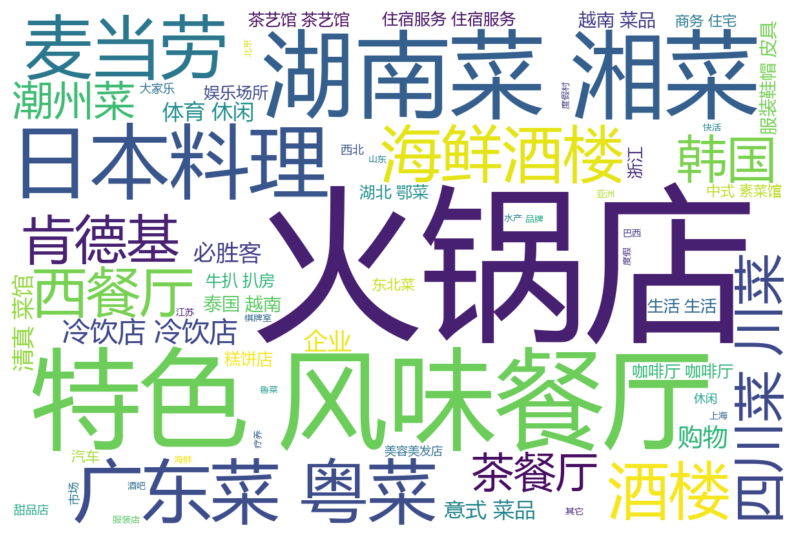

已生成过滤后的词云：food_type_wordcloud_filtered.png


In [38]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from jieba import cut

df = pd.read_csv("shenzhen_food_poi_cleaned.csv")


text = " ".join(df["type"].dropna().astype(str))

words = cut(text)


stopwords = {
    "餐饮", "餐厅", "服务", "相关", "场所", "风味",
    "地方", "综合", "美食", "店", "快餐",
    "馆", "食", "料理", "小吃", "饭店", "菜","中餐厅","快餐厅","外国","公司"
}


filtered_words = " ".join(w for w in words if w not in stopwords and len(w) > 1)


wc = WordCloud(
    font_path="msyh.ttc",  #微软雅黑
    background_color="white",
    width=1200,
    height=800
).generate(filtered_words)

plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("food_type_wordcloud_filtered.png", dpi=300)
plt.show()

print("已生成过滤后的词云：food_type_wordcloud_filtered.png")


④餐厅评分分布

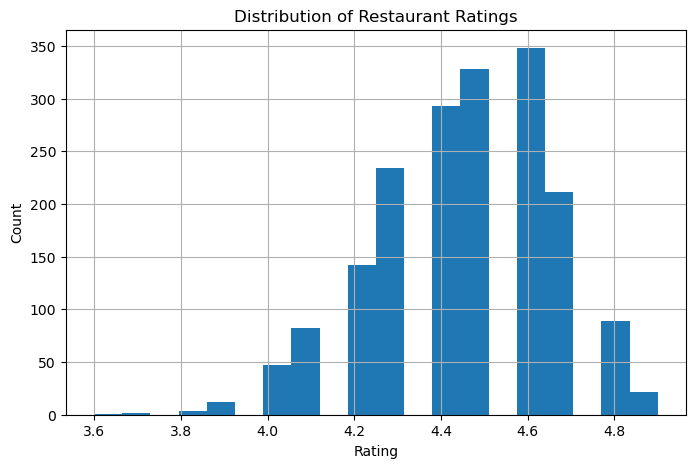

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

plt.figure(figsize=(8,5))
df["rating"].dropna().hist(bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Ratings")
plt.savefig("Distribution of Restaurant Ratings")
plt.show()


⑤人均cost分布

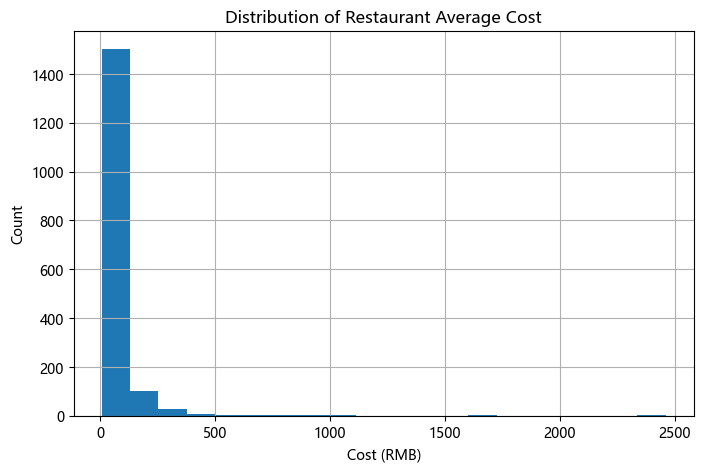

In [40]:
import pandas as pd
df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

df["cost"] = pd.to_numeric(df["cost"], errors="coerce")


plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,5))
df["cost"].dropna().hist(bins=20)
plt.xlabel("Cost (RMB)")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Average Cost")
plt.savefig("Distribution of Restaurant Average Cost")
plt.show()


⑥各区cost对比

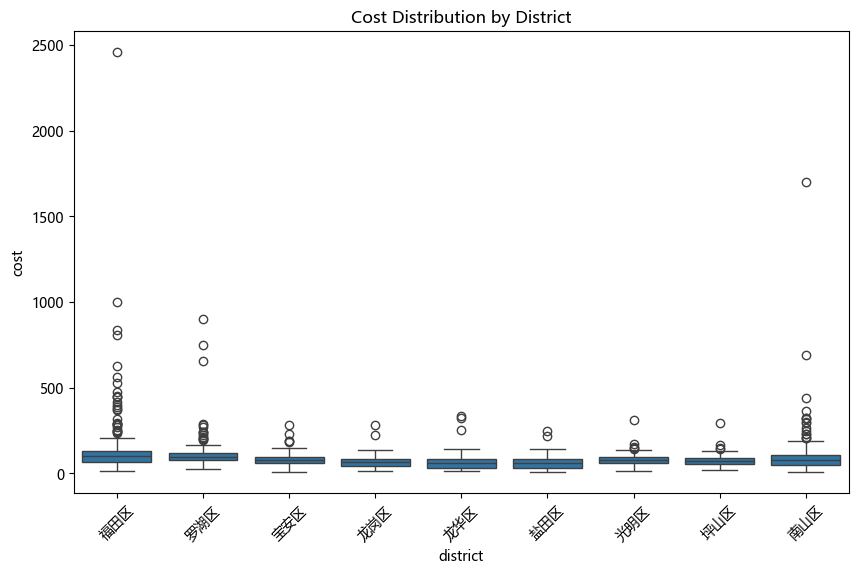

In [41]:
import seaborn as sns

df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="district", y="cost")
plt.xticks(rotation=45)
plt.title("Cost Distribution by District")
plt.savefig("Cost Distribution by District")
plt.show()


⑦评分与人均消费之间的关系

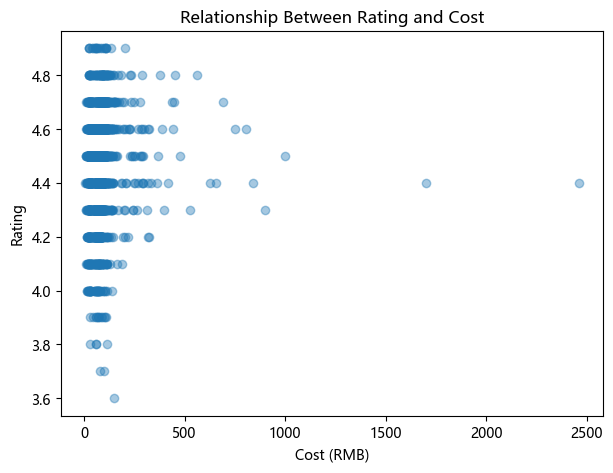

rating and cost：Relationship Between Rating and Cost


In [45]:
df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

plt.figure(figsize=(7,5))
plt.scatter(df["cost"], df["rating"], alpha=0.4)
plt.xlabel("Cost (RMB)")
plt.ylabel("Rating")
plt.title("Relationship Between Rating and Cost")
plt.savefig("Relationship Between Rating and Cost")
plt.show()

print("rating and cost：Relationship Between Rating and Cost")


⑧评分热力图

In [44]:
import folium
from folium.plugins import HeatMap

df = pd.read_csv("shenzhen_food_poi_cleaned.csv")

m = folium.Map(location=[22.55, 114.05], zoom_start=11)

heat_data = df[["lat", "lng", "rating"]].dropna().values.tolist()

HeatMap(heat_data).add_to(m)

m.save("rating_heatmap.html")

print("评分热力图已生成：rating_heatmap.html")


评分热力图已生成：rating_heatmap.html


In [6]:
import requests
import pandas as pd
import time

HTML_URL = "https://www.amap.com/service/poi/search"

DISTRICTS = ["福田区","罗湖区","南山区","宝安区","龙岗区","龙华区","盐田区","光明区","坪山区"]

headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://www.amap.com/"
}

all_data = []

for district in DISTRICTS:
    print(f"\n开始爬取：{district}")

    for page in range(1, 21):   # 20 页足够
        params = {
            "query_type": "TQUERY",
            "page": page,
            "keywords": f"{district} 美食"
        }

        r = requests.get(HTML_URL, params=params, headers=headers)

        try:
            data = r.json()
        except:
            print("  ❌ 返回不是 JSON")
            break

        pois = data.get("data", {}).get("poi_list", [])

        if not pois:
            print(f"  {district} 第 {page} 页无数据，停止")
            break

        for poi in pois:
            loc = poi.get("location","0,0").split(",")
            try:
                lng = float(loc[0]); lat = float(loc[1])
            except:
                continue

            all_data.append({
                "name": poi.get("name"),
                "type": poi.get("classify_name"),
                "address": poi.get("address"),
                "district": district,   # 我们自己填，网页接口不提供
                "lng": lng,
                "lat": lat,
                "rating": poi.get("rating"),
                "cost": poi.get("avg_price")
            })

        print(f"  第 {page} 页完成，本区累计：{len([x for x in all_data if x['district']==district])} 条")
        time.sleep(0.2)

df = pd.DataFrame(all_data)
print("\n各区数据量：")
print(df["district"].value_counts())

df.to_csv("shenzhen_html_final.csv", index=False, encoding="utf-8-sig")
print("\n📁 已保存：shenzhen_html_final.csv")



开始爬取：福田区


AttributeError: 'str' object has no attribute 'get'